In [36]:
# import libraries for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the data
data = pd.read_csv('alzheimers_disease_data.csv')

In [38]:
# Display the first 5 rows of the data
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [39]:
# Display the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [40]:
# Calcular el porcentaje de cada clase en la variable objetivo "Diagnosis"
class_distribution = data['Diagnosis'].value_counts(normalize=True) * 100
print(class_distribution)

Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


In [27]:
# Drop Patient ID column and Doctor's name column
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [29]:
# Separate features and target variable
x=data.drop("Diagnosis",axis=1)
y=data["Diagnosis"]

In [30]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [31]:
# Define the parameter grid for GridSearchCV
grid_param={
    "n_estimators":[100,200,300],
    "max_depth":[10,20,30],
    "min_samples_split":[2,5,10]
}

# Perform GridSearchCV to find the best hyperparameters
grid=GridSearchCV(RandomForestClassifier(),grid_param,cv=5)
grid.fit(x_train,y_train)


# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [32]:
# Train the model with the best parameters
best_params = grid.best_params_
rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                             max_depth=best_params['max_depth'],
                             min_samples_split=best_params['min_samples_split'])
model = rfc.fit(x_train, y_train)

In [33]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9348837209302325
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.85      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430



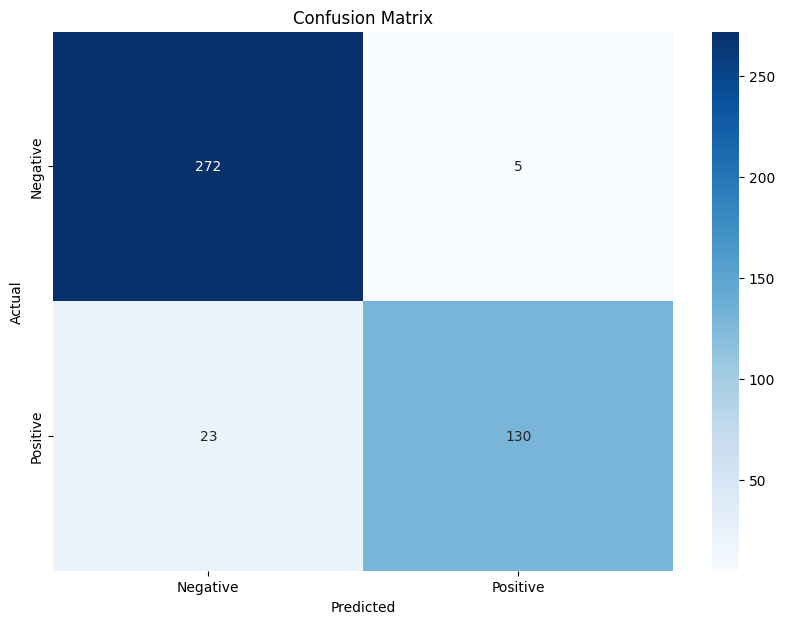

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

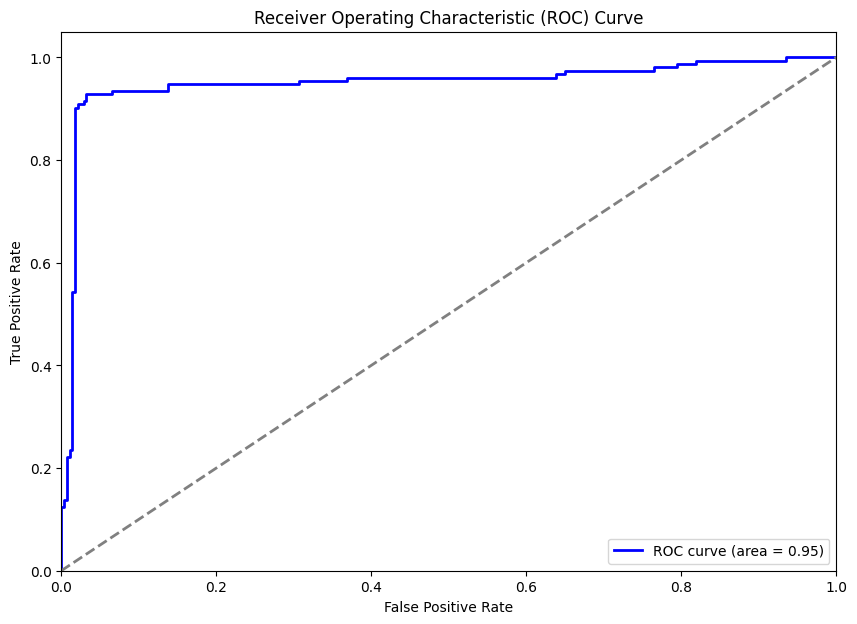

In [35]:
# ROC Curve and AUC
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()